In [5]:
!unlink data.final
!ln -s ../2_download_data/data.final

In [6]:

#import defplot
import pandas as pd
import datetime
import netCDF4
import time as t

import matplotlib.pyplot as plt
import xarray as xr
import os

In [23]:
def outer(h1,s1,h2,s2,f1):
    x=s1-(s2-s1)*(h1-f1)/(h2-h1)
    return x

def inner(h1,s1,h2,s2,f1):
    x=s1+(s2-s1)*(f1-h1)/(h2-h1)
    return x


def regu(h,s):
    z=[0,2,4,6,8,10,12,15,20,25,30,35,40,45,50,60,70,80,90,100,125,150,200,250,300,350,400,500,600,700,800,900,1000]
    t=[]
    for i in z:
        for st,j in enumerate(h):
            if(j > i and st == 0):
                t.append(outer(h[0],s[0],h[1],s[1],i))
                break
            elif(j > i):
                t.append(inner(h[st-1],s[st-1],h[st],s[st],i))
                break
            elif(j==i):
                t.append(s[st])
                break
    return t
def rmse(ar1,ar2):
    s=0
    c=0
    for i in range(len(ar1)):
        c=c+1
        dif=(ar1[i]-ar2[i])**2
        s=s+dif
    ans=(s/c)**0.5
    return ans



def com_plot(url,da,st):
    url=url
#    ds=xr.open_dataset('../data/'+da+'.nc')

    dsh=xr.open_dataset('data_hycom/ST_'+str(da)+'.nc')


    argo_name=url.split('/')[6]
    argo_num =url.split('/')[7]


    dataset = netCDF4.Dataset(url)
    time=datetime.datetime(1950, 1, 1,0,0) + datetime.timedelta(float(dataset['JULD'][0].data))+datetime.timedelta(hours=8)
    hr=time.strftime("%H")
    x=dataset['LONGITUDE'][0].data
    y=dataset['LATITUDE'][0].data

    h=dataset['PRES'][0].data
    temp=dataset['TEMP'][0].data
    salt=dataset['PSAL'][0].data


#    sst=ds['SST'].sel(MX=x,MY=y,MT=int(hr), method='nearest').values
#    sal=ds['SAL'].sel(MX=x,MY=y,MT=int(hr), method='nearest').values
#    dep=ds['MZ'].values

##############   key point  u need to change  LON170_320 and LAT182_332 to your data  ##############
    hsst=dsh['TEMP'].sel(LON170_320=x,LAT182_332=y, method='nearest').values.reshape(-1,)
#    hsal=dsh['SALINITY'].sel(LON=x,LAT=y, method='nearest').values.reshape(-1,)
    hdep=dsh['DEPTH'].values


    word='photo/'+str(time.strftime("%Y%m%d"))
    result=os.path.abspath(word)
    if not os.path.exists(result):
          os.mkdir(result)

#####   this is for schism ######
    plt.plot(temp,h*-1,'--r')
#    plt.plot(sst,dep*-1,'b')
    plt.plot(hsst,hdep*-1,'g')
    plt.ylim(-1000,0)
#    plt.legend(labels=['real', 'model','hycom'])
    rmse_hycom_temp=rmse(regu(hdep,hsst),regu(h,temp))
#    plt.title('argo '+argo_name+'/'+argo_num+' sst rmse is '+str('%.4f'% rmse_temp))
    plt.xlabel('temp(℃)')
    plt.ylabel('depth(m)')
    dirs=os.path.join(result,str(st)+'_temp.png')
    plt.savefig(dirs)

    plt.clf()

    rmse_salt=np.nan
    rmse_hycom_temp=np.nan

#    plt.plot(salt,h*-1,'--r')
#    plt.plot(sal,dep*-1,'b')
#    plt.plot(hsal,hdep*-1,'g')
#    plt.ylim(-1000,0)
#    plt.legend(labels=['real', 'model','hycom'])
#    rmse_salt=rmse(sal,regu(h,salt))
#    rmse_hycom_salt=rmse(regu(hdep,hsal),regu(h,salt))
#    plt.title('argo '+argo_name+'/'+argo_num+' salt  rmse is '+str('%.4f'% rmse_salt))
#    plt.xlabel('salt')
#    plt.ylabel('depth(m)')
#    dirs=os.path.join(result,str(st)+'_salt.png')
#    plt.savefig(dirs)

#    plt.clf()


#    with open('info','a') as f:
#         f.writelines(str(st)+'  '+'x= '+str(x)+' y= '+str(y)+' date = '+time.strftime("%Y%m%d %H")+'  '+str('%.4f'% rmse_temp)+'  '+str('%.4f'% rmse_salt)+' '+str('%.4f'% rmse_hycom_temp)+' '+str('%.4f'% rmse_hycom_salt))
#         f.writelines('\n')


In [11]:
data=pd.read_csv('data.final',sep='\s+',header=None)

In [16]:
dataset = netCDF4.Dataset(url)
time=datetime.datetime(1950, 1, 1,0,0) + datetime.timedelta(float(dataset['JULD'][0].data))+datetime.timedelta(hours=8)
hr=time.strftime("%H")
x=dataset['LONGITUDE'][0].data
y=dataset['LATITUDE'][0].data

h=dataset['PRES'][0].data
temp=dataset['TEMP'][0].data
salt=dataset['PSAL'][0].data

In [22]:
dsh

<xarray.Dataset>
Dimensions:          (DEPTH: 40, LAT182_332: 151, LON170_320: 151, TIME: 1, bnds: 2)
Coordinates:
  * LON170_320       (LON170_320) float64 116.0 116.1 116.2 ... 127.9 128.0
  * LAT182_332       (LAT182_332) float64 18.0 18.08 18.16 ... 29.84 29.92 30.0
  * DEPTH            (DEPTH) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
  * TIME             (TIME) datetime64[ns] 2019-01-27
Dimensions without coordinates: bnds
Data variables:
    LON170_320_bnds  (LON170_320, bnds) float64 9.969e+36 ... 9.969e+36
    LAT182_332_bnds  (LAT182_332, bnds) float64 9.969e+36 ... 9.969e+36
    DEPTH_bnds       (DEPTH, bnds) float64 -1.0 1.0 1.0 ... 4.5e+03 5.5e+03
    TEMP             (TIME, DEPTH, LAT182_332, LON170_320) float32 ...
Attributes:
    history:      FERRET V6.1   21-Feb-19
    Conventions:  CF-1.0

IndexError: list index out of range

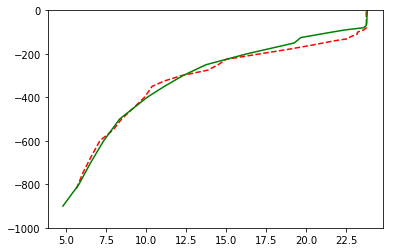

In [24]:
for st,url in enumerate(data[0]):
    dataset = netCDF4.Dataset(url)
    t.sleep(1)
    time=datetime.datetime(1950, 1, 1,0,0) + datetime.timedelta(float(dataset['JULD'][0].data))+datetime.timedelta(hours=8)
    ds=time.strftime("%Y%m%d")
    try:
        print(ds,dt)
        com_plot(url,ds,st)
    except:
        try:
            print('err')
            defplot.com_plot(url,ds,st)
        except:
            with open('err','a') as f:
                 f.writelines(str(st)+'   '+str(url)+'  '+str(ds))
                 f.writelines('\n')